In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
def plot_distribution( df , target , var , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=var , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , target , shade= True )
    facet.set( xlim=( 0 , df[ target ].max() ) )
    facet.add_legend()

# Učitavanje podataka 

In [3]:
data = pd.read_csv("data/Iris.csv")

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Null vrednosti

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


# Suvišne vrednosti

In [6]:
data = data.drop("Id", axis=1)

# Eksploracija

In [7]:
# Koliko klasa imamo? 
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
# Da li su klase balansirane?
data["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [9]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Dužina lista - Vrsta

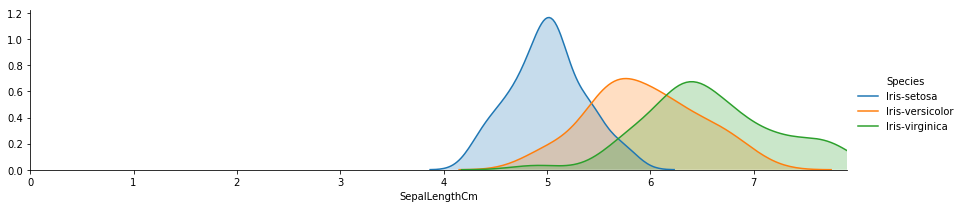

In [10]:
plot_distribution(data, "SepalLengthCm", "Species")

# Širina lista - Vrsta

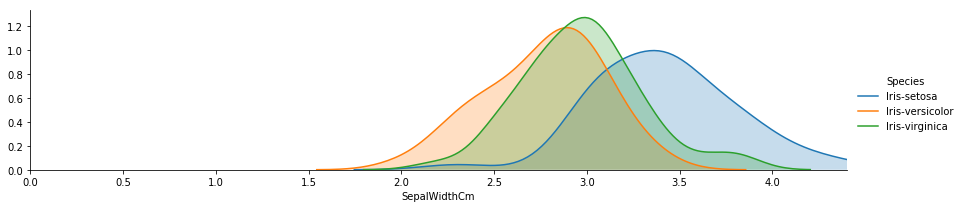

In [11]:
plot_distribution(data, "SepalWidthCm", "Species")

# Dužina Latice - Vrsta

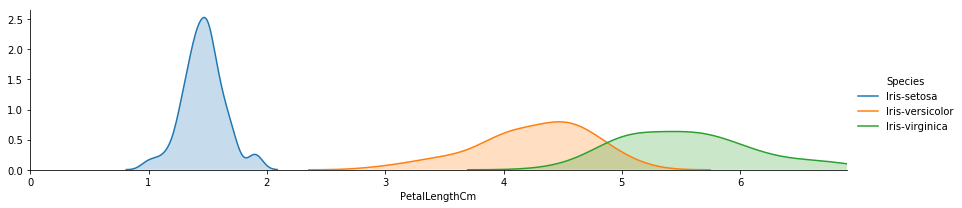

In [12]:
plot_distribution(data, "PetalLengthCm", "Species")

# Širina Latice - Vrsta

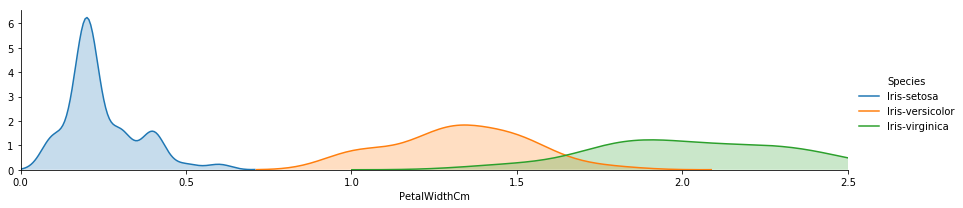

In [13]:
plot_distribution(data, "PetalWidthCm", "Species")

# FaceGrid

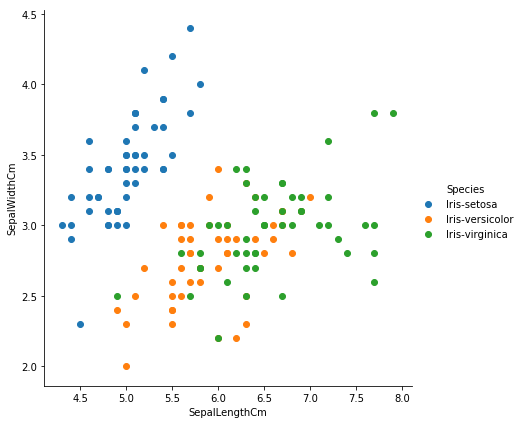

In [14]:
sns.FacetGrid(data, hue="Species", size=6) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

plt.show()

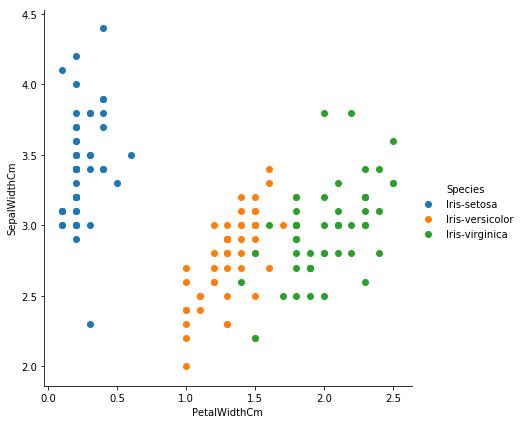

In [15]:
sns.FacetGrid(data, hue="Species", size=6) \
   .map(plt.scatter, "PetalWidthCm", "SepalWidthCm") \
   .add_legend()

plt.show()

# Enokdiranje varijabli

In [16]:
le = preprocessing.LabelEncoder()
le.fit(data["Species"])
y=le.transform(data["Species"])

# new col
data['EncodedSpecies'] = y

print('Classes:',le.classes_)
print('Response variable after encoding:',y)

Classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Response variable after encoding: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [17]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,EncodedSpecies
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [18]:
data = data.drop("Species",axis=1)

# Test i Training Set

In [19]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'EncodedSpecies'],
      dtype='object')

In [20]:
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data['EncodedSpecies']
X_train, X_test,x_train, x_test = train_test_split(X,y)

# KNN

In [21]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, x_train)
# X_test

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [22]:
predict = value = knn.predict(X_test)
predict

array([0, 1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 1, 2, 2, 1, 0, 1, 1, 0, 0, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 0])

In [23]:
metrics.accuracy_score(x_test, predict)

0.9736842105263158

In [24]:
metrics.confusion_matrix(x_test, predict)

array([[13,  0,  0],
       [ 0, 12,  0],
       [ 0,  1, 12]], dtype=int64)

# Logistic Regression

In [25]:
logreg = LogisticRegression()

logreg.fit(X_train, x_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
pred = logreg.predict(X_test)

In [27]:
metrics.accuracy_score(x_test, pred)

0.9736842105263158

In [28]:
metrics.confusion_matrix(x_test, pred)

array([[13,  0,  0],
       [ 0, 11,  1],
       [ 0,  0, 13]], dtype=int64)

# Cross Validation

In [29]:
cross_val_score(logreg, X,y)

array([0.96078431, 0.92156863, 0.95833333])

In [30]:
cross_val_score(logreg, X,y).mean()

0.9468954248366014

In [31]:
cross_val_score(knn, X,y)

array([0.98039216, 0.92156863, 1.        ])

In [32]:
cross_val_score(knn, X,y).mean()

0.9673202614379085

# Decision Trees

In [33]:
d_tree = tree.DecisionTreeClassifier()

In [34]:
cross_val_score(d_tree,X,y, cv=5)

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])